<a href="https://colab.research.google.com/github/siqisiqisiqisiqi/deep-learning-hw1/blob/main/hw1_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Compose, Normalize 
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn.modules.conv import Conv2d
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10
random_seed = 1
torch.manual_seed(random_seed)

In [ ]:
training_data = datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform=Compose([ToTensor(),Normalize((0.1307,),(0.3081,))])
)
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=Compose([ToTensor(),Normalize((0.1307,),(0.3081,))])
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self,par1):
      super(NeuralNetwork, self).__init__()
      self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
      self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
      self.conv2_drop = nn.Dropout2d()
      self.fc1 = nn.Linear(320, par1)
      self.fc2 = nn.Linear(par1, 10)
  def forward(self, x):
    x = F.relu(F.max_pool2d(self.conv1(x),2))
    x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
    x = x.view(-1, 320)
    x = F.relu(self.fc1(x))
    x = F.dropout(x, training=self.training)
    x = self.fc2(x)
    return F.log_softmax(x)

In [ ]:
train_loader = DataLoader(training_data, batch_size=batch_size_train, shuffle=False)
test_loader = DataLoader(test_data, batch_size=batch_size_test, shuffle=True)

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [ ]:
def Accuracy(dataloader):
  network.eval()
  correct = 0
  with torch.no_grad():
    for data, target in dataloader:
      output = network(data)
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  accu = 100. * correct / len(dataloader.dataset)
  return accu

In [ ]:
def test(num):
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  print('\n par num = {} Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(num, test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))
  return test_loss

In [ ]:
def train(epoch):
  # network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    network.train()
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()

    # if batch_idx % log_interval == 0:
    #   print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
    #     epoch, batch_idx * len(data), len(train_loader.dataset),
    #     100. * batch_idx / len(train_loader), loss.item()))
  return loss

In [ ]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for x1 in range(1,50,2):
  network = NeuralNetwork(x1)
  num = count_parameters(network)
  optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                        momentum=momentum)
  n_epochs = 1
  for epoch in range(1, n_epochs + 1):
    train_loss = train(epoch)
    # test(num)
  train_loss = train_loss.item()
  test_loss = test(num)
  test_accu = Accuracy(test_loader)
  train_accu = Accuracy(train_loader)
  train_losses.append([num, train_loss])
  test_losses.append([num, test_loss])
  train_acc.append([num, train_accu.item()])
  test_acc.append([num, test_accu.item()])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



 par num = 5621 Test set: Avg. loss: 2.0066, Accuracy: 2616/10000 (26%)


 par num = 6283 Test set: Avg. loss: 1.5500, Accuracy: 5721/10000 (57%)


 par num = 6945 Test set: Avg. loss: 0.9574, Accuracy: 7795/10000 (78%)


 par num = 7607 Test set: Avg. loss: 0.6813, Accuracy: 8979/10000 (90%)


 par num = 8269 Test set: Avg. loss: 0.5673, Accuracy: 9026/10000 (90%)


 par num = 8931 Test set: Avg. loss: 0.4570, Accuracy: 8859/10000 (89%)


 par num = 9593 Test set: Avg. loss: 0.3330, Accuracy: 9122/10000 (91%)


 par num = 10255 Test set: Avg. loss: 0.3023, Accuracy: 9246/10000 (92%)


 par num = 10917 Test set: Avg. loss: 0.3106, Accuracy: 9294/10000 (93%)


 par num = 11579 Test set: Avg. loss: 0.2873, Accuracy: 9206/10000 (92%)


 par num = 12241 Test set: Avg. loss: 0.2453, Accuracy: 9336/10000 (93%)


 par num = 12903 Test set: Avg. loss: 0.2575, Accuracy: 9277/10000 (93%)


 par num = 13565 Test set: Avg. loss: 0.2382, Accuracy: 9321/10000 (93%)


 par num = 14227 Test set: Avg.

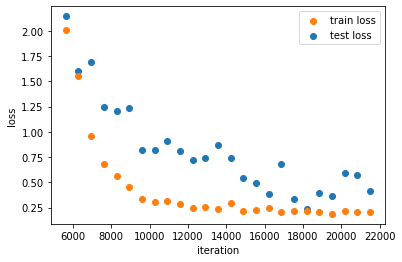

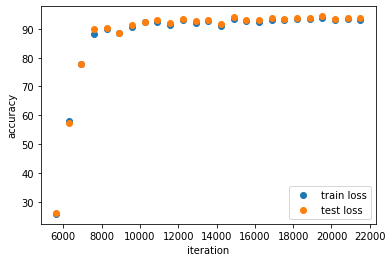

In [ ]:
test_losses = np.array(test_losses)
train_losses = np.array(train_losses)
plt.figure()
plt.xlabel("iteration")
plt.ylabel("loss")
p1 = plt.scatter(train_losses[:,0],train_losses[:,1])
p0 = plt.scatter(test_losses[:,0],test_losses[:,1])
plt.legend([p0, p1],["train loss","test loss"])
path = "/content/drive/MyDrive/Colab Notebooks"
plt.savefig(path + "/hw1_3_2_1.png")
plt.show()
train_acc = np.array(train_acc)
test_acc = np.array(test_acc)
plt.figure()
plt.xlabel("iteration")
plt.ylabel("accuracy")
p2 = plt.scatter(train_acc[:,0],train_acc[:,1])
p3 = plt.scatter(test_acc[:,0],test_acc[:,1])
plt.legend([p2, p3],["train loss","test loss"])
path = "/content/drive/MyDrive/Colab Notebooks"
plt.savefig(path + "/hw1_3_2_2.png")
# plt.show()

In [ ]:
from google.colab import files
path = "/content/drive/MyDrive/Colab Notebooks"
plt.savefig(path + "/hw1_3_2.png")

<Figure size 432x288 with 0 Axes>